In [82]:
from src.utils.paths import *
import pandas as pd
import os
import matplotlib.pyplot as plt

In [83]:
#timestamp1 = '20240307_1237'
#timestamp2 = '20240307_1248'
#timestamp3 = '20240307_1253'
#timestamp4 = '20240307_1256'

#df1 = pd.read_csv(os.path.join(EXPORT_DIR, "noisy_simdata", timestamp1,  "metrics_ranking.csv"))
# directory functioniert nicth trotz python path auf repo. wenn pythonpath auf source dann nicht in analysis anwendbar
# habe jetzt mir da einfach 3 files reingehauen und mache darauf die function

In [84]:
df1 = pd.read_csv('metrics_ranking1.csv', index_col = 0)
df2 = pd.read_csv('metrics_ranking2.csv', index_col = 0)
df3 = pd.read_csv('metrics_ranking3.csv', index_col = 0)
df3.head()

,Model,RMSE,MAPE,sMAPE,RMSE Ranking,MAPE Ranking,sMAPE Ranking
0,Weighted Ensemble: Inverse Error Covariance,0.008724,0.005932,0.395219,1,1,1
1,Naive,0.008982,0.006280,0.418434,2,2,2
2,Exponential Smoothing,0.008993,0.006291,0.419173,3,3,3
3,Naive (drift),0.009092,0.006410,0.427172,4,4,4
4,Meta Ensemble: Linear Regression,0.009518,0.006631,0.441373,5,5,5


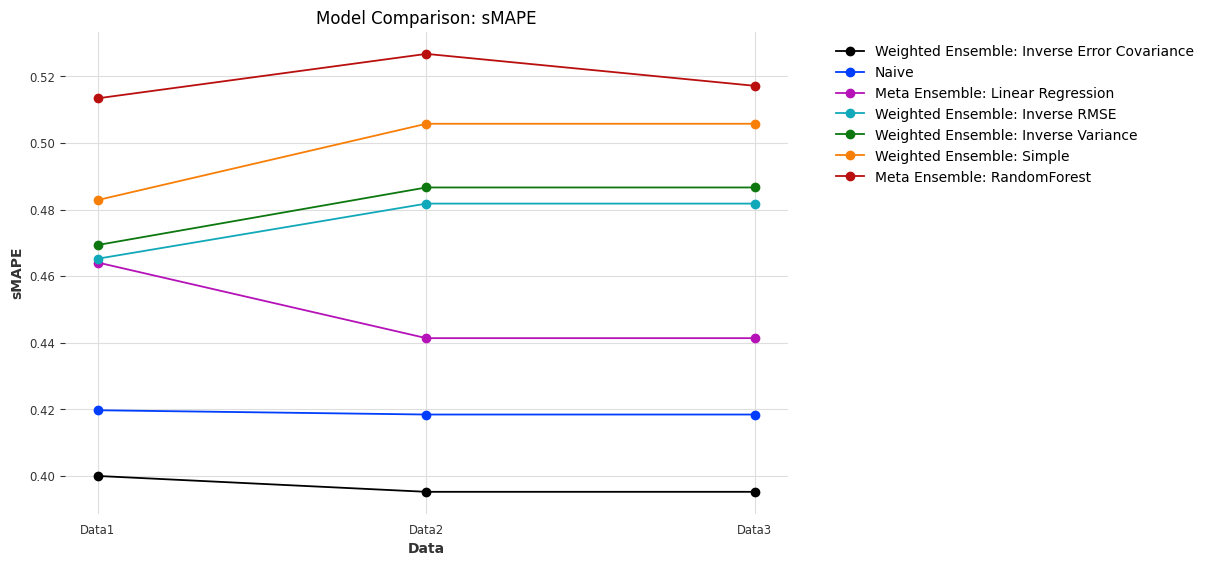

In [85]:
import matplotlib.pyplot as plt

def plot_metrics(metric, datasets, data_labels=None):
    """
    Plot comparison of a specified metric across different datasets for various models.

    Parameters:
        metric (str):                           The metric to be plotted. Supported metrics are 'sMAPE', 'MAPE', or 'RMSE'.
        datasets (list):                        A list of pandas DataFrames containing model metrics.
        data_labels (list or None, optional):   Labels for the x-axis representing each dataset. 
                                                If None, default labels "Dataset 1", "Dataset 2", etc., will be used.

    Raises:
        ValueError: If an invalid metric is provided.

    Example:
        # Example usage
        datasets = [df1, df2, df3]                  
        labels = ['Data1', 'Data2', 'Data3']        
        plot_metrics('sMAPE', datasets, labels)
    """
    # Validating metric input
    valid_metrics = ['sMAPE', 'MAPE', 'RMSE']
    if metric not in valid_metrics:
        raise ValueError(f"Invalid metric '{metric}'. Please choose from: {', '.join(valid_metrics)}")

    
    # List to store preprocessed dataframes
    preprocessed_dataframes = []

    # Dictionary to store data for each model
    models_data = {}

    for i, df in enumerate(datasets):
        # Filter out rows where the model is an ensemble or only naive (excluding naive with drift)
        filtered_df = df[(df['Model'].str.contains('Ensemble')) | 
                         ((df['Model'] == 'Naive') & (~df['Model'].str.contains('drift')))]

        ### Remove specific models (this can be undoen and was implemented to remove models that perform far worse than the rest)
        filtered_df = filtered_df[~filtered_df['Model'].str.contains('Meta Ensemble: SVR')]
        filtered_df = filtered_df[~filtered_df['Model'].str.contains('Meta Ensemble: Ridge')]
        filtered_df = filtered_df[~filtered_df['Model'].str.contains('Meta Ensemble: MLP')]

        # Remove ranking columns
        columns_to_keep = ['Model', metric]
        filtered_df = filtered_df[columns_to_keep]

        # Store preproccessed data
        preprocessed_dataframes.append(filtered_df)

        # Iterate over each row in the filtered DataFrame
        for _, row in filtered_df.iterrows():
            # Extract the model name and the value of the metric for the current row
            model = row['Model']
            value = row[metric]

            # Check if the model is not already in the dictionary of models_data
            if model not in models_data:
                # If the model is not in the dictionary, create a new entry with empty lists for x and y
                models_data[model] = {'x': [], 'y': []}

            # Append the index (representing the dataset) to the 'x' list for the current model
            models_data[model]['x'].append(i)

            # Append the metric value to the 'y' list for the current model
            models_data[model]['y'].append(value)

    # Plot data for each model
    for model, data in models_data.items():
        plt.plot(data['x'], data['y'], marker='o', linestyle='-', label=model)

    # Labeling
    plt.xlabel('Data')
    plt.ylabel(metric)
    plt.title(f'Model Comparison: {metric}')

    # Customize the x-axis tick marks based on whether custom data labels are provided
    if data_labels:
        # Use custom data labels
        plt.xticks(range(len(datasets)), data_labels) 
    else:
        # Default to Dataset 1, Dataset 2, etc.
        plt.xticks(range(len(datasets)), [f'Dataset {i+1}' for i in range(len(datasets))])
    
    # Cropping and other formatting
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.gcf().set_size_inches(30, 6)
    plt.show()


# List of datasets
datasets = [df1, df2, df3]
# Example x-axis labels              
labels = ['Data1', 'Data2', 'Data3']
        
plot_metrics('sMAPE', datasets, labels)